# Exploratory Data Analysis
Here, I want to take some time to explore the smoke detection dataset.  


## 1. Information provided by publisher
First, let's take a look at the information the publisher gave on this dataset.


### 1.1. Context
A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

#### Types of Smoke Detectors
1. Photoelectric Smoke Detector:  
A photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. In some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. The received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; the circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.  

2. Ionization Smoke Detector:  
An ionization smoke detector uses a radioisotope to ionize air. If any smoke particles enter the open chamber, some of the ions will attach to the particles and not be available to carry the current in that chamber. An electronic circuit detects that a current difference has developed between the open and sealed chambers, and sounds the alarm.  
  
The author of this dataset has successfully created a smoke detection device with the help of IOT devices and AI model.


### 1.2. About the dataset
Collection of training data is performed with the help of IOT devices since the goal is to develop a AI based smoke detector device.
Many different environments and fire sources have to be sampled to ensure a good dataset for training. A short list of different scenarios which are captured:

- Normal indoor
- Normal outdoor
- Indoor wood fire, firefighter training area
- Indoor gas fire, firefighter training area
- Outdoor wood, coal, and gas grill
- Outdoor high humidity
- etc.

The dataset is nearly 60.000 readings long. The sample rate is 1Hz for all sensors. To keep track of the data, a UTC timestamp is added to every sensor reading.

## 2. Own analysis
Next, we want to get some more insights on the data ourselves. let's take a look.

### 2.1. Load the data
Let's load the data and take a first glance at it

In [1]:
# all import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../../data/raw/smoke_detection_iot.csv", index_col=0)

### 2.2. Preliminary Analysis
We can take a very high level look at the data. Nothing too fancy, just getting some initial information before diving in more deeply.

In [3]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

Okay, so let's find an explanation for each of the columns.  

- `UTC`: Timestamp
- `Temperature[C]`: Air Temperature; measured in Celsius
- `Humidity[%]`: Air Humidity; measured in percent
- `TVOC[ppb]`: Total Volatile Organic Compunds; measured in parts per billion
- `eCO2[ppm]`: CO2 equivalent concentration; measured in parts per million
- `Raw H2`: raw molecular hydrogen; measured in ???
- `Raw Ethanol`: raw ethanol gas; measured in ???
- `Pressure[hPa]`: Air Pressure; measured in hectopascal
- `PM1.0`: particulate matter size smaller than 1 µm
- `PM2.5`: particulate matter size between 1 and 2.5 µm
- `NC0.5`: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 
- `NC1.0`: Number concentration of particulate matter. 0.5 µm < 1.0 µm (NC1.0);
- `NC2.5`: Number concentration of particulate matter. 1.0 µm < 2.5 µm (NC2.5);
- `CNT`: Sample counter
- `Fire Alarm`: binary label indicating whether there is a fire (1) or not (0)

Now let's look at the top and bottom of the dataset, just to get a feel for the data.

In [4]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.tail()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


Let's look at some random examples where there was a fire and where there was not.  

Can we see a clear pattern here?

In [6]:
random_sample = df.groupby("Fire Alarm").apply(lambda x: x.sample(n=10))
random_sample

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
Fire Alarm                                                             
0          58351  1655125773          -7.466        45.59         75   
           57634  1655125056           8.415        42.77         68   
           1852   1654735183          23.759        47.59         58   
           25784  1654762133          12.560        56.37         10   
           60181  1655127603          16.038        44.22        217   
           25567  1654761916          13.770        55.23          2   
           58032  1655125454          -8.277        46.40         95   
           58474  1655125896          -5.609        43.64         89   
           423    1654733754          24.775        49.73         11   
           57463  1655124885          17.420        40.69         52   
1          47669  1654784018          24.400        54.00       1367   
           31085  1654767434          20.390        49.29        155   
           44183  1654780532          24.590        53.39       1212   
           6465   1654739796          -7.158        54.87        191   
           35699  1654772048          25.750        50.26        940   
           5118   1654738449          -8.738        48.97         44   
           39959  1654776308          27.020        47.34       1057   
           12489  1654745820          19.924        48.54       1069   
           39035  1654775384          25.680        53.47       1057   
           5368   1654738699          -9.214        48.37          7   

                  eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  \
Fire Alarm                                                                      
0          58351        400   12797        20649        937.430   1.76   1.83   
           57634        440   12784        20688        937.555   2.05   2.13   
           1852         400   13121        19996        939.592   0.58   0.60   
           25784        400   12954        19893        939.790   0.16   0.17   
           60181        449   12757        20510        937.389   1.80   1.87   
           25567        400   12844        19827        939.830   0.37   0.41   
           58032        400   12780        20652        937.466   1.97   2.05   
           58474        400   12786        20632        937.430   1.88   1.95   
           423          400   12734        19759        939.827   0.20   0.25   
           57463        400   12836        20715        937.503   1.71   1.78   
1          47669        410   12965        19387        938.732   2.24   2.33   
           31085        400   13167        20100        939.658   1.43   1.49   
           44183        400   12916        19425        938.705   1.48   1.54   
           6465         400   13160        20070        939.631   0.97   1.01   
           35699        663   12794        19492        939.096   2.46   2.56   
           5118         400   13239        20171        939.688   1.60   1.66   
           39959        436   12874        19462        938.845   2.08   2.16   
           12489        561   12828        19460        938.985   2.04   2.12   
           39035        471   12866        19465        938.911   1.96   2.04   
           5368         400   13258        20225        939.718   2.49   2.59   

                  NC0.5  NC1.0  NC2.5    CNT  Fire Alarm  
Fire Alarm                                                
0          58351  12.15  1.894  0.043   1465           0  
           57634  14.08  2.195  0.050    748           0  
           1852    3.99  0.623  0.014   1852           0  
           25784   1.10  0.171  0.004    790           0  
           60181  12.37  1.929  0.044   3295           0  
           25567   2.53  0.422  0.026    573           0  
           58032  13.56  2.114  0.048   1146           0  
           58474  12.92  2.015  0.046   1588           0  
           423     1.30  0.270  0.046    423           0  
        

To be completely honest, I do not see any pattern here...  
Maybe it is a combination of parameters that plays a role? We will find out later if a machine can learn to set off a fire alarm with this data.

Lastly, for our preliminary data analysis, we use the `.describe()` method to see if we find something interesting there.

In [7]:
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


- `Temperature` goes from -22°C to 60°C. My guess would be that higher temperatures correlate with fire.
    - We will see about that in the data visualization part.
- `TVOC` and `eCO2` suspiciously both cap at 60000 ppb/ppm. The 75th percentile is suspiciously low compared to that.
    - We need to investigate that.
    - We need to investigate outliers in general.
- `Pressure` is a rather small range (931-940 hPa).
    - a small change in that value could already be significant.
- All the `PM` and `NC` values go from 0 to something insanely big. The 75th percentile is suspiciously small compared to the max.
    - investigate outliers
- Mean of `Fire Alarm` is ~0.71, so we have unbalanced data here.
    - We have to do *something* about that before training
    - because obviously in the day to day, the input data is massively skewed towards no fire
    - at the same time, we should strive for 100% recall with as high precision as possible.
- We for **CERTAIN** need some scaler

### 2.3. Data Cleaning / Processing

We want to check the data to see if there is some processing or cleaning necessary.  
Missing values are usually the lowest hanging fruit, so let's check for that.

In [8]:
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Cool, no missing values. Great work from the publisher! Maybe there already was some cleaning before publishing the dataset :)

TODO: We need to check for outliers and possibly remove them (if they are incorrect that is). We will do that in the visualization section and clean the data on demand then

### 2.4. Data Visualization
Let us continue by visualizing some data from the dataset to get a better feel for it.  
First, we will check the distribution of values.  

<Figure size 640x480 with 0 Axes>

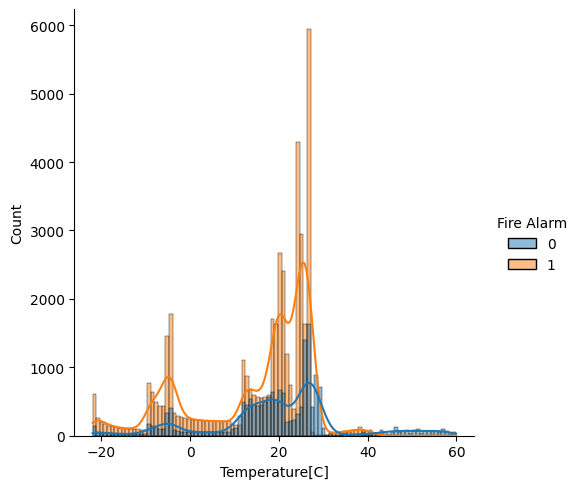

<Figure size 640x480 with 0 Axes>

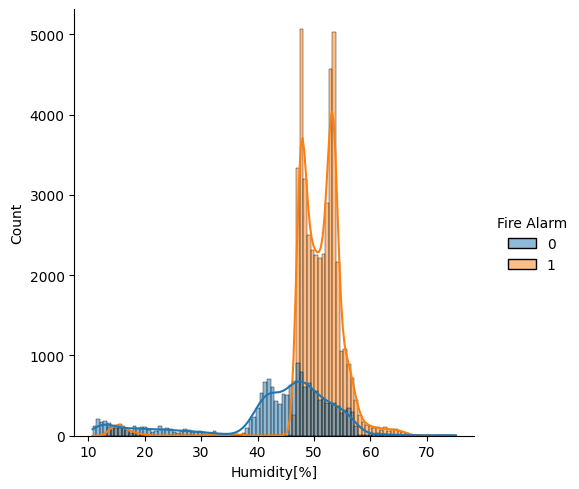

<Figure size 640x480 with 0 Axes>

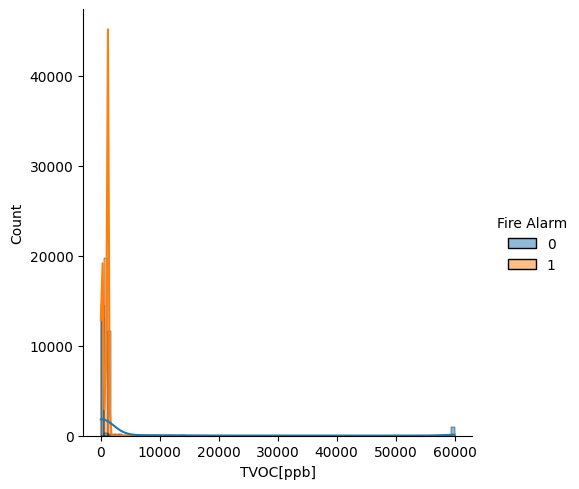

<Figure size 640x480 with 0 Axes>

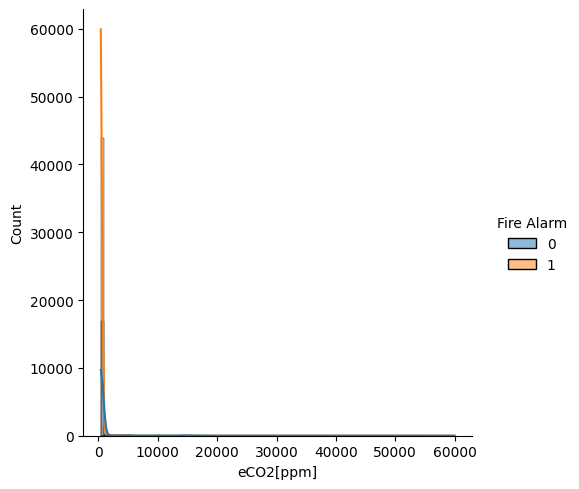

<Figure size 640x480 with 0 Axes>

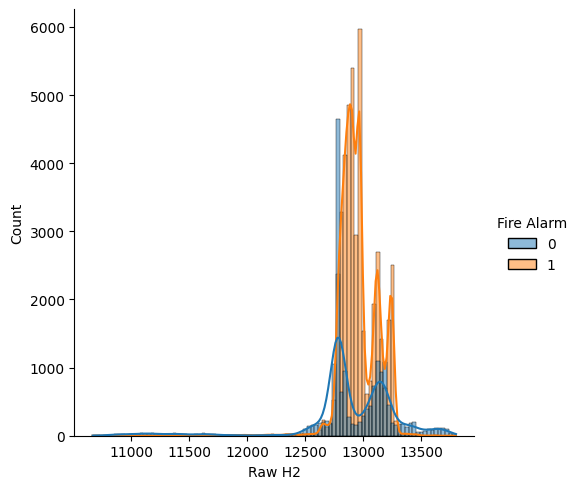

<Figure size 640x480 with 0 Axes>

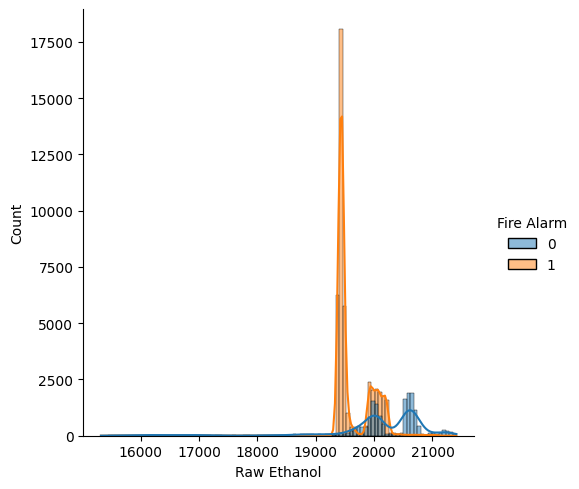

<Figure size 640x480 with 0 Axes>

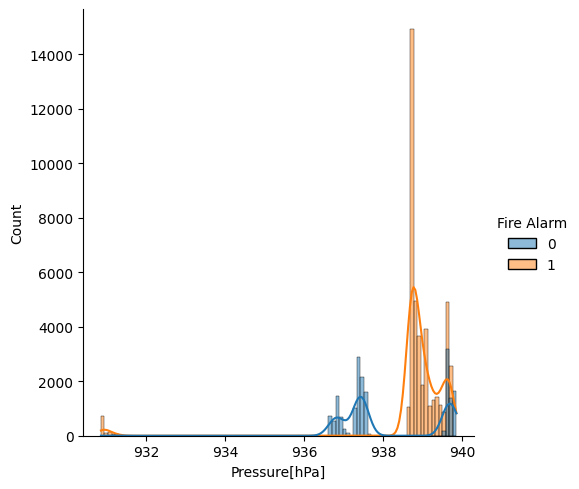

<Figure size 640x480 with 0 Axes>

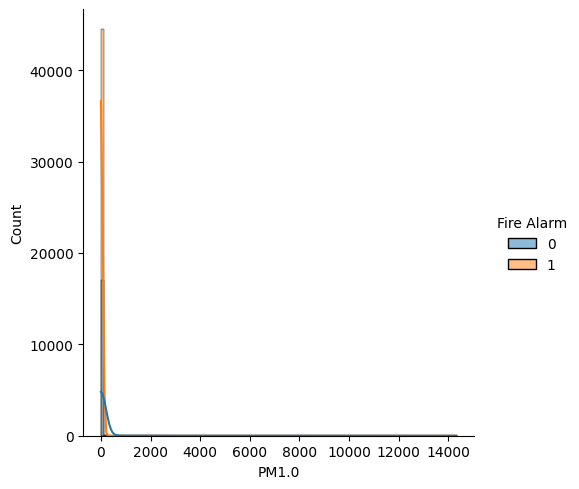

<Figure size 640x480 with 0 Axes>

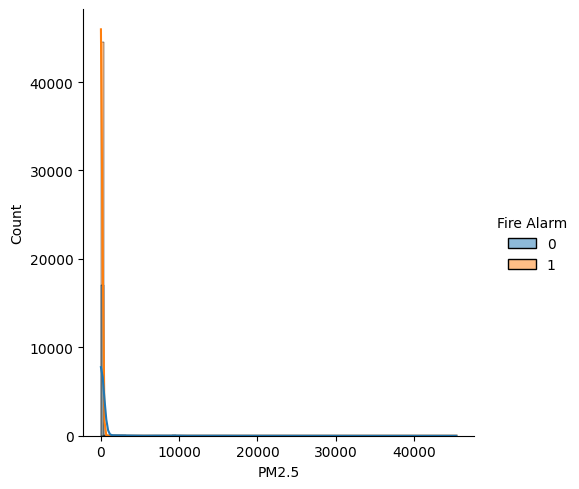

<Figure size 640x480 with 0 Axes>

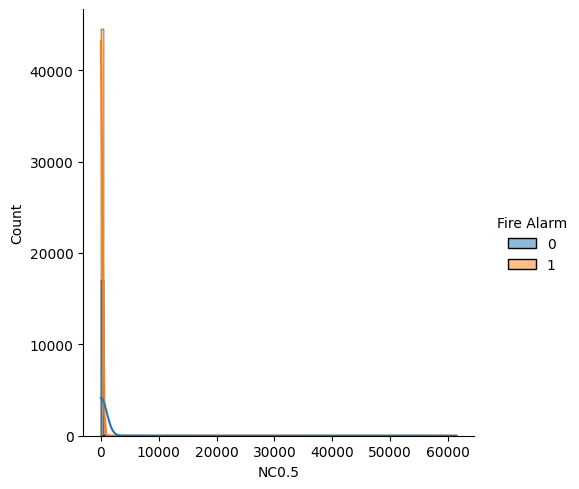

<Figure size 640x480 with 0 Axes>

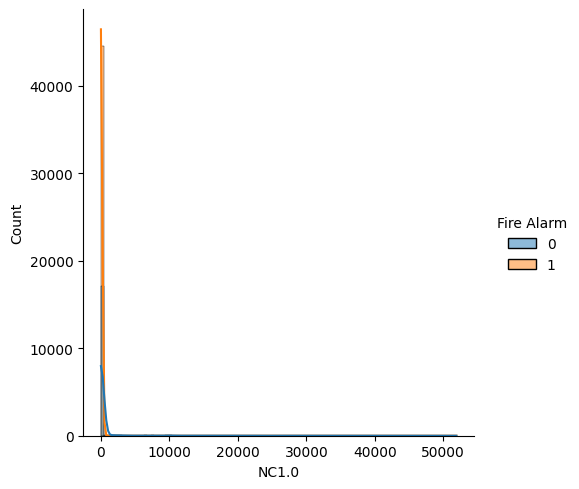

<Figure size 640x480 with 0 Axes>

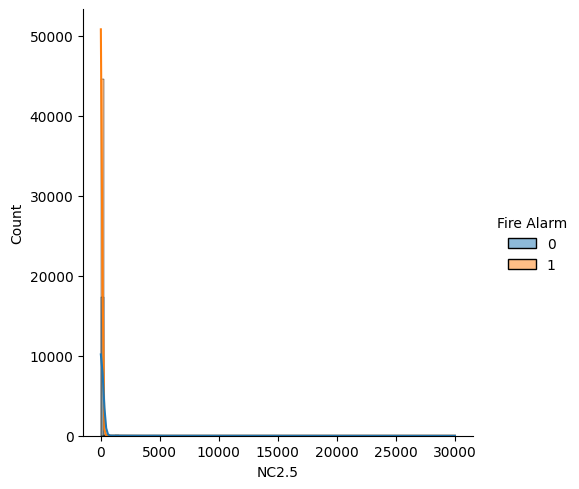

In [9]:
for column in [
    'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 
    'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 
    'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'
]:
    plt.figure()
    sns.displot(data=df, x=column, hue="Fire Alarm", kde=True, bins=100)
    plt.show()

So here we can clearly see that the PM and NC values are mostly 0. Maybe this is the reason that the high values look like outliers.  
For now, we will assume that those aren't outliers after all and the data is just heavily skewed to small values for these columns.  

<AxesSubplot: >

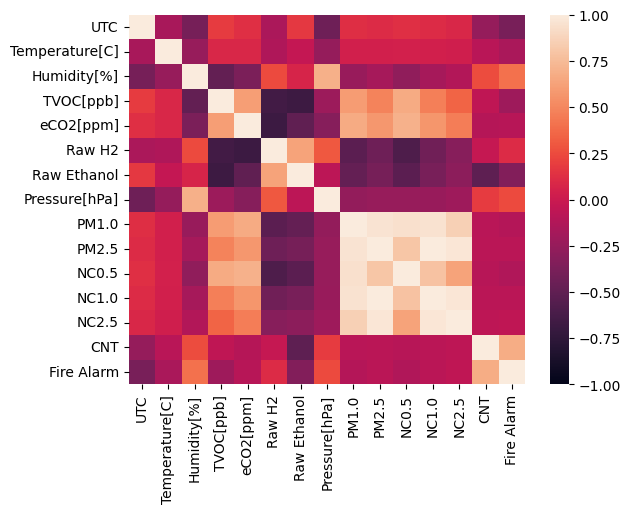

In [10]:
pear_corr = df.corr(method="pearson")
sns.heatmap(pear_corr, vmin=-1.0, vmax=1.0)

For some reason, the CNT is highly correlated to the Fire Alarm. This is of course not what we want. We do not want the Fire Alarm to go off just because we have made many measurements already.  
For this reason, we will get rid of the `CNT` column. Additionally, we will get rid of the `UTC` column, because it does not add any value to detecting a Fire.  
- Actually, having information about the time of year might be of value. 
- If our model fails later on, we will investigate it. 
- For now, we will assume that we can infer the time of year with the other measurements, i.e. temperature

Some further findings:
- `Temperature`
    - does not really correlate with anything -> This means higher temperature does not correlate with fire...
    - distribution of Fires and No Fires is pretty similar
- `Humidity`
    - correlates with `Pressure` and `Fire Alarm` -> might be **important feature**
    - distribution of `Humidity` when there are fires is quite different to no fires -> higher humidity
- `TVOC`
    - correlates *heavily* with `eCO2` and somewhat with the `PM` and `NC` values
    - negatively correlates with `Raw H2` and `Raw Ethanol`
    - when fire: value slightly above 0
    - when no fire: value mostly at 0
    - **important feature**
- re `Raw H2` and `Raw Ethanol`
    - heavily correlate with one another
    - distributions for fire and no fire are different from one another -> **important feature**
- re `PM` and `NC` values
    - all heavily correlate with one another
    - somewhat correlate with `TVOC` and `eCO2` as well
    - somewhat negatively correlate with `Raw H2` and `Raw Ethanol`

In [12]:
df.drop(columns=["UTC", "CNT"], inplace=True)
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


## 3. Baseline Model

Next, I want to create a real basic baseline model. This will just get all input features with real simple data splitting (no down-/upsampling) and we will just see, how good it can get without much effort from us data scientists. Afterwards, we can take some time to manipulate the data and trying out some different models to see if and by how much we can beat the baseline model.  

A good baseline model would be XGBoost.